In [1]:
import numpy as np 
import pandas as pd

df_train = pd.read_csv('../datasets/over_under_sampling/train.csv')

In [2]:
df_train.sample(2)

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
398926   996660       0          0              1          2              0   
406434  1015861       0          0              1          9              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
398926              0              1              0              0  ...   
406434              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
398926           5           2           5           9               0   
406434           5           2           2           7               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
398926               1               1               0               0   
406434               0               0               0               0   

        ps_calc_20_bin  
398926               1  
406434               0  

[2 rows x 59 columns]

In [3]:
target_count = df_train['target'].value_counts()
target_count

0    573518
1     21694
Name: target, dtype: int64

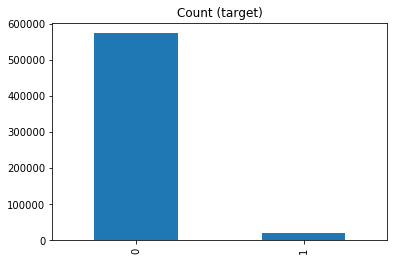

In [5]:
target_count.plot(kind='bar', title='Count (target)')

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = df_train.columns[2:]

X = df_train[features]
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [7]:
print('Accuracy is: {:.2f}'.format(accuracy * 100.0))

Accuracy is: 96.32


In [16]:
#df_train.target.value_counts().sum()

In [20]:
# The majority class or more likely scenario
print(round(df_train.target.value_counts()[0] / df_train.target.value_counts().sum(), 4))

# This number below is the baseline or benchmark

0.9636


1    21694
0    21694
Name: target, dtype: int64


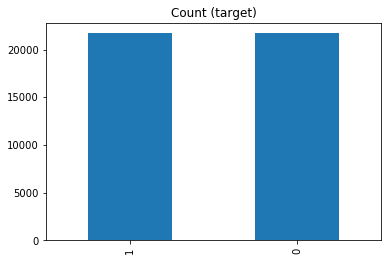

In [8]:
count_class_0, count_class_1 = df_train.target.value_counts()

df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

# Under or Down sampling (take the majority class and shrink it)
# Can cause underfitting
# Lose a lot of information about a lot of data. We lost about 520,000 data points, which is a significant amount of information.
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title = 'Count (target)')

1    573518
0    573518
Name: target, dtype: int64


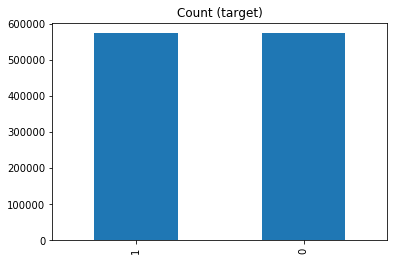

In [28]:
# Over or Up sampling (take the minority class and expand it)
count_class_0, count_class_1 = df_train.target.value_counts()

df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

# Up Over sampling reproduces data which can cause overfitting
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([df_class_1_over, df_class_0], axis=0)

print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title = 'Count (target)')

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
# https://imbalanced-learn.readthedocs.io/en/stable/api.html